In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

df = pd.read_csv("World-Stock-Dataset.csv")

In [7]:
df.head()  #Display the first few rows
df.info()  #Check data types and missing values
df.describe()  #summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304545 entries, 0 to 304544
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           304545 non-null  object 
 1   Open           304545 non-null  float64
 2   High           304545 non-null  float64
 3   Low            304545 non-null  float64
 4   Close          304545 non-null  float64
 5   Volume         304545 non-null  float64
 6   Dividends      304545 non-null  float64
 7   Stock Splits   304545 non-null  float64
 8   Brand_Name     304545 non-null  object 
 9   Ticker         304545 non-null  object 
 10  Industry_Tag   304545 non-null  object 
 11  Country        304545 non-null  object 
 12  Capital Gains  2 non-null       float64
dtypes: float64(8), object(5)
memory usage: 30.2+ MB


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,304545.000000,304545.000000,304545.000000,304545.000000,3.045450e+05,304545.000000,304545.000000,2.0
mean,74.433046,75.275494,73.568160,74.439877,2.283996e+07,0.003611,0.000891,0.0
std,139.419306,140.910340,137.830477,139.396355,8.627362e+07,0.069704,0.116486,0.0
min,0.196890,0.199922,0.192798,0.198861,0.000000e+00,0.000000,0.000000,0.0
25%,15.767358,15.988712,15.550000,15.771576,1.368400e+06,0.000000,0.000000,0.0
50%,34.840527,35.252735,34.412780,34.852516,4.580200e+06,0.000000,0.000000,0.0
75%,81.330002,82.134819,80.500000,81.370094,1.212280e+07,0.000000,0.000000,0.0
max,3445.580078,3463.070068,3370.000000,3427.610107,7.421641e+09,15.000000,50.000000,0.0


In [9]:
df["Date"] = pd.to_datetime(df["Date"])

/var/folders/gs/y2msp5h950783qs6_n60qqk80000gn/T/ipykernel_43033/936118274.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Date"] = pd.to_datetime(df["Date"])


In [11]:
import pandas as pd

df = pd.read_csv("World-Stock-Dataset.csv")

df["Date"] = pd.to_datetime(df["Date"], utc=True)


In [13]:
aapl_data = df[df["Ticker"] == "AAPL"].copy()

In [15]:
aapl_data.set_index("Date", inplace=True)

In [17]:
aapl_data.sort_index(inplace=True)

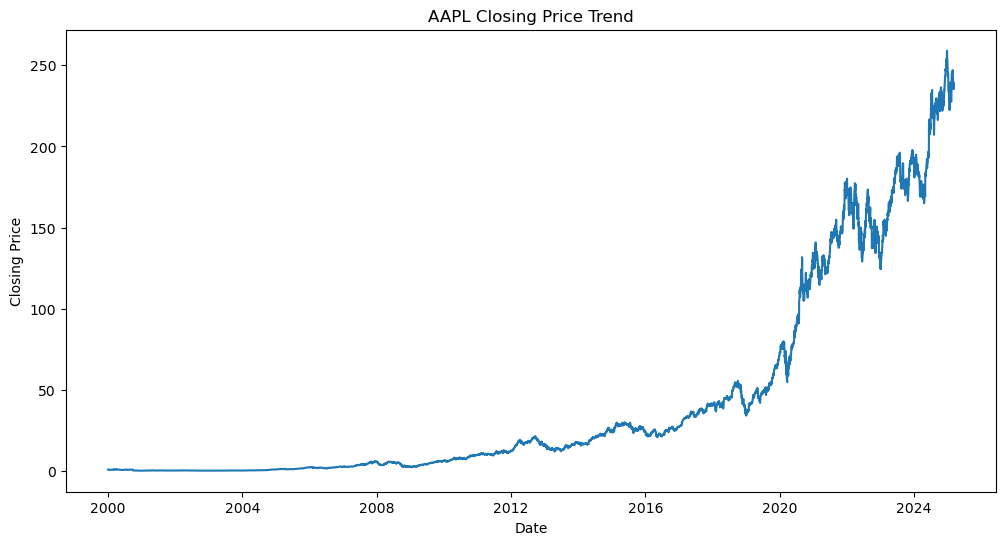

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(aapl_data["Close"])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("AAPL Closing Price Trend")
plt.show()

In [21]:
aapl_data.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Volume              0
Dividends           0
Stock Splits        0
Brand_Name          0
Ticker              0
Industry_Tag        0
Country             0
Capital Gains    6376
dtype: int64

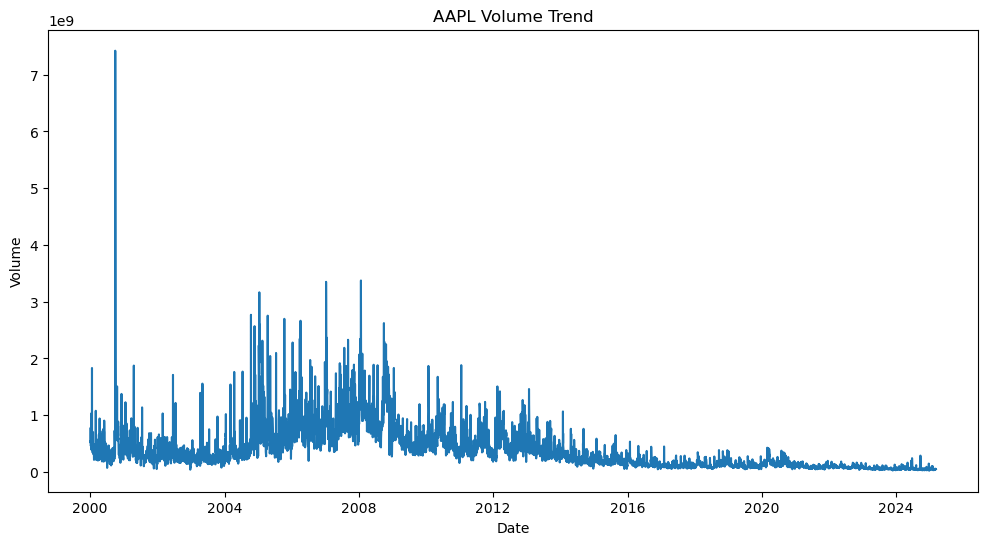

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_data["Volume"])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("AAPL Volume Trend")
plt.show()

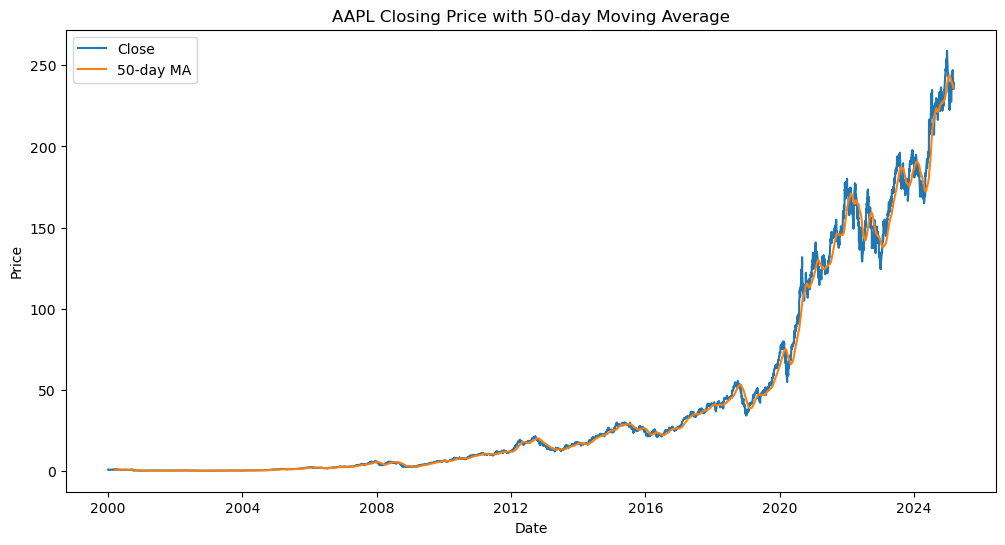

In [27]:
aapl_data["MA_50"] = aapl_data["Close"].rolling(window=50).mean()
plt.figure(figsize=(12, 6))
plt.plot(aapl_data["Close"], label="Close")
plt.plot(aapl_data["MA_50"], label="50-day MA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("AAPL Closing Price with 50-day Moving Average")
plt.legend()
plt.show()

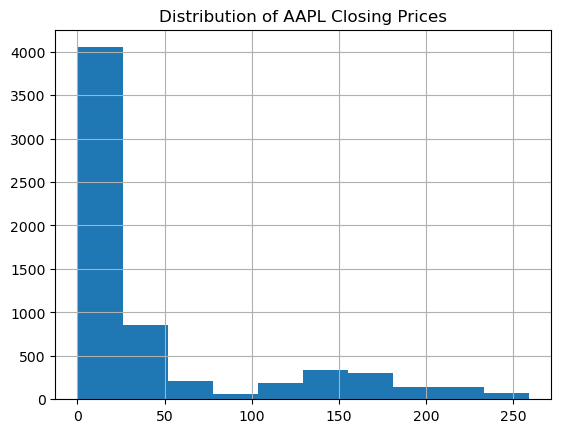

In [29]:
aapl_data["Close"].hist()
plt.title("Distribution of AAPL Closing Prices")
plt.show()

In [31]:
aapl_data.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Volume              0
Dividends           0
Stock Splits        0
Brand_Name          0
Ticker              0
Industry_Tag        0
Country             0
Capital Gains    6376
MA_50              49
dtype: int64

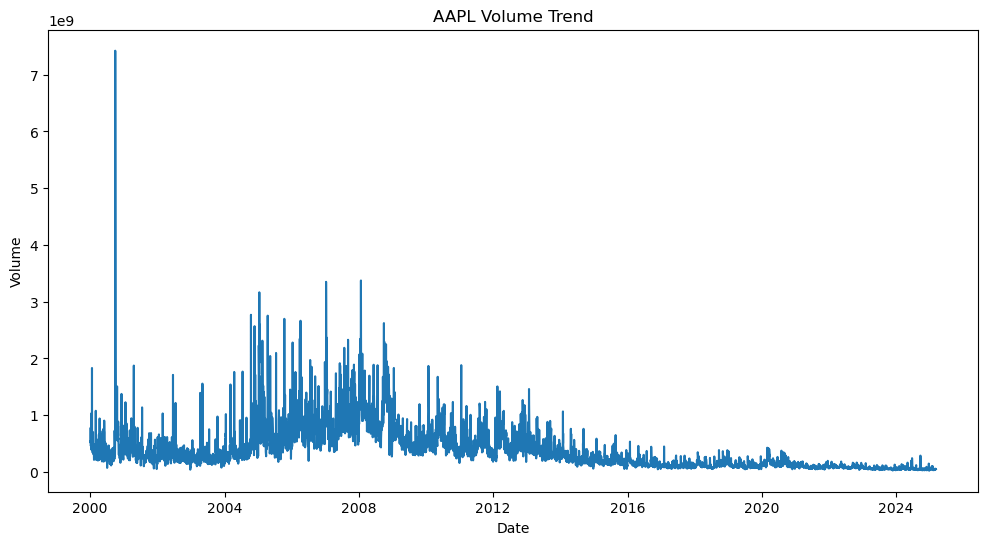

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_data["Volume"])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("AAPL Volume Trend")
plt.show()

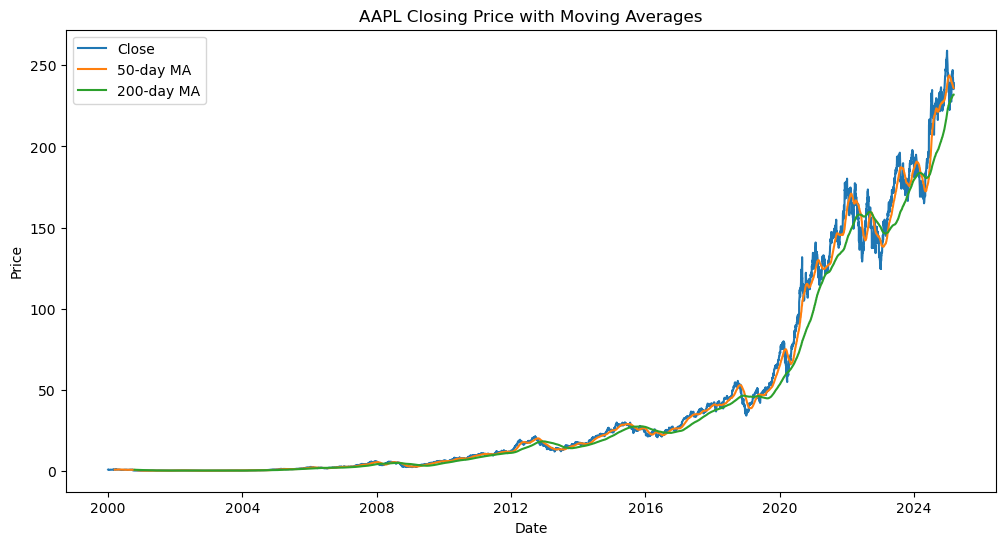

In [35]:
aapl_data["MA_50"] = aapl_data["Close"].rolling(window=50).mean()
aapl_data["MA_200"] = aapl_data["Close"].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(aapl_data["Close"], label="Close")
plt.plot(aapl_data["MA_50"], label="50-day MA")
plt.plot(aapl_data["MA_200"], label="200-day MA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("AAPL Closing Price with Moving Averages")
plt.legend()
plt.show()

In [37]:
aapl_data["Close_1"] = aapl_data["Close"].shift(1)
aapl_data["Close_7"] = aapl_data["Close"].shift(7)

In [39]:
aapl_data["DayOfWeek"] = aapl_data.index.dayofweek
aapl_data["Month"] = aapl_data.index.month

In [45]:
train_size = int(len(aapl_data) * 0.8)
train_data = aapl_data[:train_size]
test_data = aapl_data[train_size:]

Shape of df: (304545, 13)
Unique Tickers: ['PTON' 'TM' 'ADDYY' 'AXP' 'PMMAF' 'V' 'ADBE' 'SQ' 'UL' 'CSCO' 'JPM'
 'LVMUY' 'ABNB' 'MAR' 'ZI' 'HLT' 'AMD' 'MCD' 'HD' 'MA' 'JNJ' 'UBER' 'PG'
 'COIN' 'FDX' 'MMM' 'JWN' 'PHG' 'FL' 'NFLX' 'KO' 'UBSFY' 'CROX' 'LUV'
 'SHOP' 'AMZN' 'AAPL' 'NKE' 'TGT' 'GOOGL' 'SPOT' 'ZM' 'DIS' 'RBLX' 'NTDOY'
 'DAL' 'MSFT' 'COST' 'AEO' 'HSY' 'TSLA' 'PINS' 'BAMXF' 'CMG' 'POAHY'
 'LOGI' 'CL' 'CRM' 'NVDA' 'SBUX' 'HMC']
Shape of aapl_data after filtering: (6376, 13)
First date: 2000-01-03 05:00:00+00:00
Last date: 2025-03-07 05:00:00+00:00
Number of duplicate dates: 44
Shape of aapl_data before fillna: (6376, 12)
Shape of aapl_data after fillna: (6376, 12)
Shape of aapl_data before dropna: (6376, 12)
Shape of aapl_data after dropna: (6375, 12)
Shape of train_data: (5100, 12)
Shape of test_data: (1275, 12)
Length of train_X: 5100
Length of test_X: 1275
RMSE: 2.6903549511618357


/var/folders/gs/y2msp5h950783qs6_n60qqk80000gn/T/ipykernel_43033/1265628709.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aapl_data = aapl_data.fillna(method='ffill')


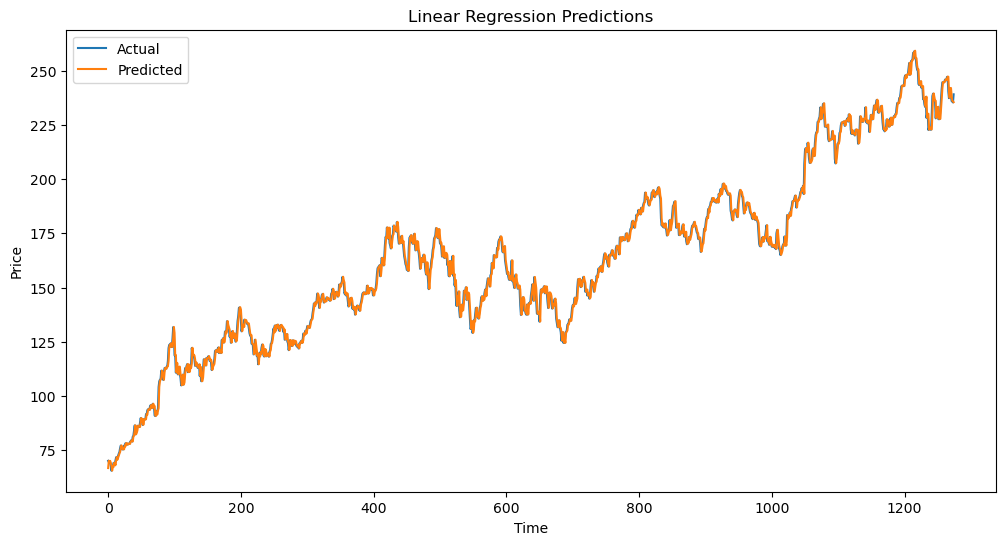

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Load the Data
df = pd.read_csv("World-Stock-Dataset.csv")
print(f"Shape of df: {df.shape}")
print(f"Unique Tickers: {df['Ticker'].unique()}")

# 2. Select the Stock (AAPL)
aapl_data = df[df["Ticker"] == "AAPL"].copy()
print(f"Shape of aapl_data after filtering: {aapl_data.shape}")

# 3. Prepare Data
aapl_data["Date"] = pd.to_datetime(aapl_data["Date"], utc=True)
aapl_data.set_index("Date", inplace=True)
aapl_data.sort_index(inplace=True)
print(f"First date: {aapl_data.index.min()}")
print(f"Last date: {aapl_data.index.max()}")
print(f"Number of duplicate dates: {aapl_data.index.duplicated().sum()}")

# Handle missing values: Fill missing values with the previous valid observation
print(f"Shape of aapl_data before fillna: {aapl_data.shape}")
aapl_data = aapl_data.fillna(method='ffill')
print(f"Shape of aapl_data after fillna: {aapl_data.shape}")

# Create lagged feature
aapl_data["Close_1"] = aapl_data["Close"].shift(1)

# Remove the Capital Gains column
aapl_data = aapl_data.drop("Capital Gains", axis=1)

# Drop any remaining NaN values after shifting (first row will have NaN)
print(f"Shape of aapl_data before dropna: {aapl_data.shape}")
aapl_data = aapl_data.dropna()
print(f"Shape of aapl_data after dropna: {aapl_data.shape}")

# 4. Split into train and test sets
train_size = int(len(aapl_data) * 0.8)
train_data = aapl_data[:train_size]
test_data = aapl_data[train_size:]
print(f"Shape of train_data: {train_data.shape}")
print(f"Shape of test_data: {test_data.shape}")

# Prepare the data for Linear Regression
train_X = train_data[["Close_1"]]
train_y = train_data["Close"]
test_X = test_data[["Close_1"]]
test_y = test_data["Close"]

#Debugging prints
print(f"Length of train_X: {len(train_X)}")
print(f"Length of test_X: {len(test_X)}")

# 5. Create and train the model
model = LinearRegression()
model.fit(train_X, train_y)

# 6. Make predictions
predictions = model.predict(test_X)

# 7. Evaluate the model
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print(f"RMSE: {rmse}")

# 8. Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(test_y.values, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

In [53]:
for i in range(1, 6):
    aapl_data[f"Close_{i}"] = aapl_data["Close"].shift(i)
aapl_data = aapl_data.dropna()


In [55]:
train_size = int(len(aapl_data) * 0.8)
train_data = aapl_data[:train_size]
test_data = aapl_data[train_size:]

In [57]:
features = [f"Close_{i}" for i in range(1, 6)]
train_X = train_data[features]
train_y = train_data["Close"]  # Predict the current "Close"
test_X = test_data[features]
test_y = test_data["Close"]

In [59]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [61]:
predictions = model.predict(test_X)

In [63]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MAE: 2.016197783255186
R-squared: 0.9956005865964906


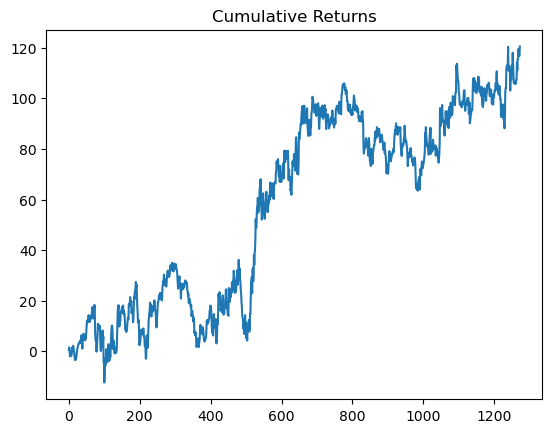

In [65]:
trading_signals = []
for i in range(len(test_y)):
    if predictions[i] > test_y.iloc[i]:
        trading_signals.append(1)  # Buy
    else:
        trading_signals.append(-1)  # Sell

returns = []
for i in range(1, len(test_y)):
    returns.append(trading_signals[i - 1] * (test_y.iloc[i] - test_y.iloc[i - 1]))

cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.title("Cumulative Returns")
plt.show()

RMSE: 2.7462635827017414
MAE: 2.0194269267543725
R-squared: 0.9956087918668912


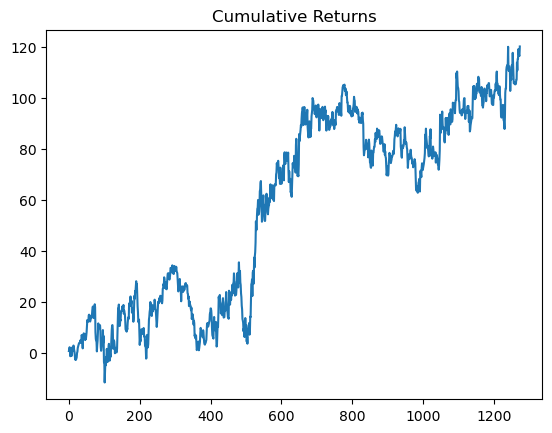

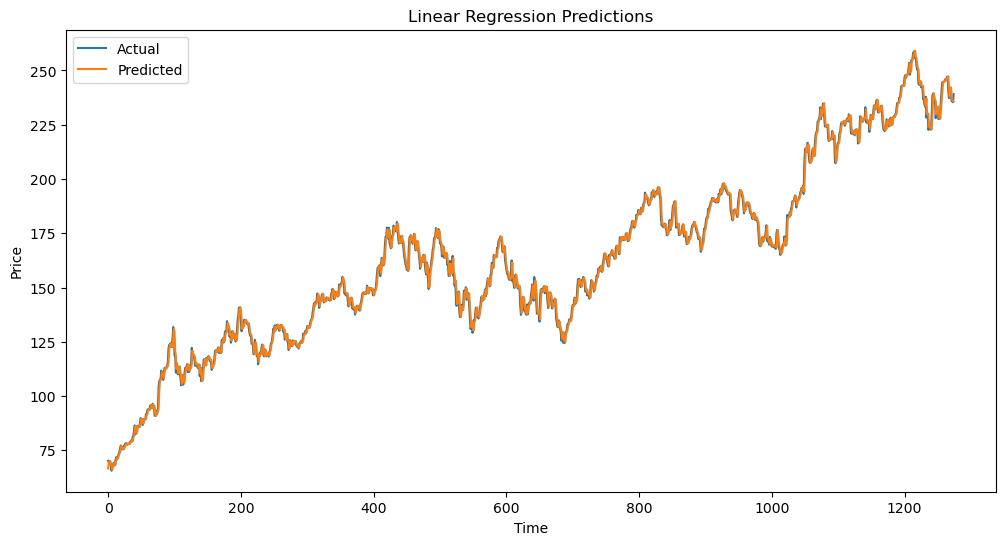

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and prepare data (as before)
df = pd.read_csv("World-Stock-Dataset.csv")
aapl_data = df[df["Ticker"] == "AAPL"].copy()
aapl_data["Date"] = pd.to_datetime(aapl_data["Date"], utc=True)
aapl_data.set_index("Date", inplace=True)
aapl_data.sort_index(inplace=True)
aapl_data = aapl_data.ffill()
aapl_data = aapl_data.drop("Capital Gains", axis=1)

# Create lagged features for 5 days
for i in range(1, 6):
    aapl_data[f"Close_{i}"] = aapl_data["Close"].shift(i)
aapl_data = aapl_data.dropna()

# Split data
train_size = int(len(aapl_data) * 0.8)
train_data = aapl_data[:train_size]
test_data = aapl_data[train_size:]

# Prepare data for Linear Regression
features = [f"Close_{i}" for i in range(1, 6)]
train_X = train_data[features]
train_y = train_data["Close"]
test_X = test_data[features]
test_y = test_data["Close"]

# Train model
model = LinearRegression()
model.fit(train_X, train_y)

# Make predictions
predictions = model.predict(test_X)

# Evaluate model (statistical metrics)
rmse = np.sqrt(mean_squared_error(test_y, predictions))
mae = mean_absolute_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

# Evaluate model (simulated trading)
trading_signals = []
for i in range(len(test_y)):
    if predictions[i] > test_y.iloc[i]:
        trading_signals.append(1)
    else:
        trading_signals.append(-1)

returns = []
for i in range(1, len(test_y)):
    returns.append(trading_signals[i - 1] * (test_y.iloc[i] - test_y.iloc[i - 1]))

cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.title("Cumulative Returns")
plt.show()

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(test_y.values, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

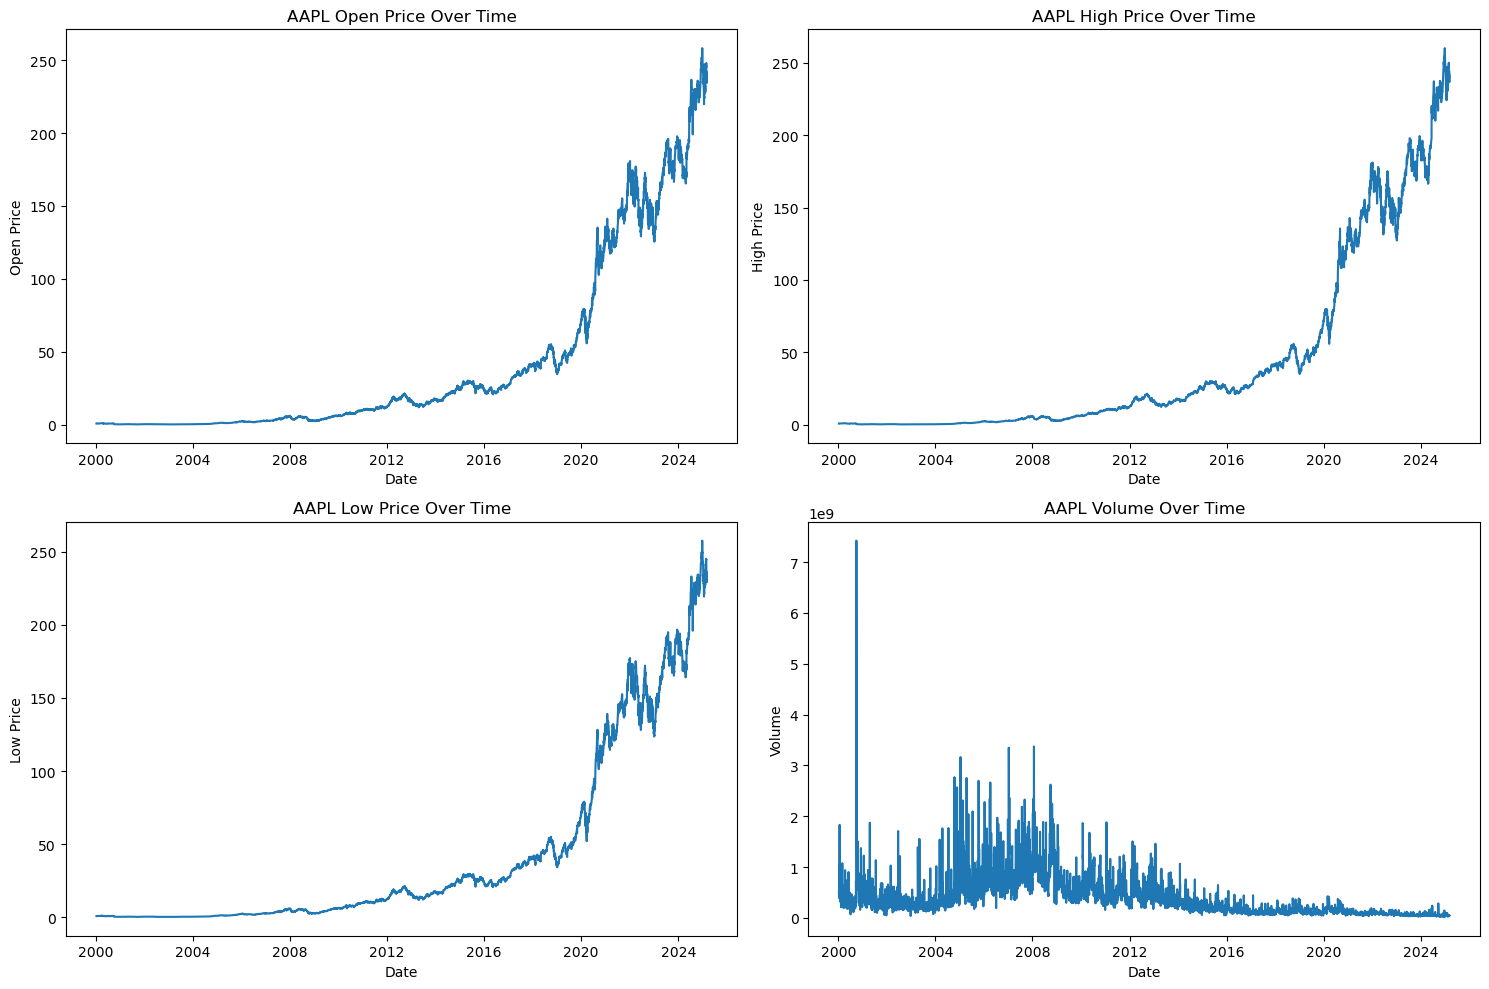

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'aapl_data' is your DataFrame after preprocessing

# Time series plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(aapl_data["Open"])
plt.title("AAPL Open Price Over Time")
plt.xlabel("Date")
plt.ylabel("Open Price")

plt.subplot(2, 2, 2)
plt.plot(aapl_data["High"])
plt.title("AAPL High Price Over Time")
plt.xlabel("Date")
plt.ylabel("High Price")

plt.subplot(2, 2, 3)
plt.plot(aapl_data["Low"])
plt.title("AAPL Low Price Over Time")
plt.xlabel("Date")
plt.ylabel("Low Price")

plt.subplot(2, 2, 4)
plt.plot(aapl_data["Volume"])
plt.title("AAPL Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")

plt.tight_layout()
plt.show()

## Observations from Time Series Plots

The following observations were made from the time series plots of Apple's stock data:

* **Consistent Price Trends:** The "Open," "High," "Low," and "Close" prices exhibit very similar upward trends, especially pronounced after 2020. This indicates a strong growth period for Apple's stock.
* **Volume Spikes:** The "Volume" plot shows several large spikes, suggesting periods of unusually high trading activity. These spikes could be due to significant news events, earnings announcements, or other market-moving factors.
* **One Extreme Volume Spike:** One very large spike in volume is significantly higher than the rest. This could be an outlier or an indication of a very significant event that requires further investigation.
* **Visual Correlation:** The price plots ("Open," "High," "Low," "Close") show a high degree of visual correlation, suggesting that these features might provide redundant information to the model.
* **Overall Growth Trajectory:** The plots confirm the overall growth of Apple's stock over the given time period.

These observations highlight the need to:

* Investigate the cause of the volume spikes, especially the extreme one.
* Consider feature selection to avoid redundancy due to the high correlation between price features.
* Take into account the strong upward trend when developing the prediction model.

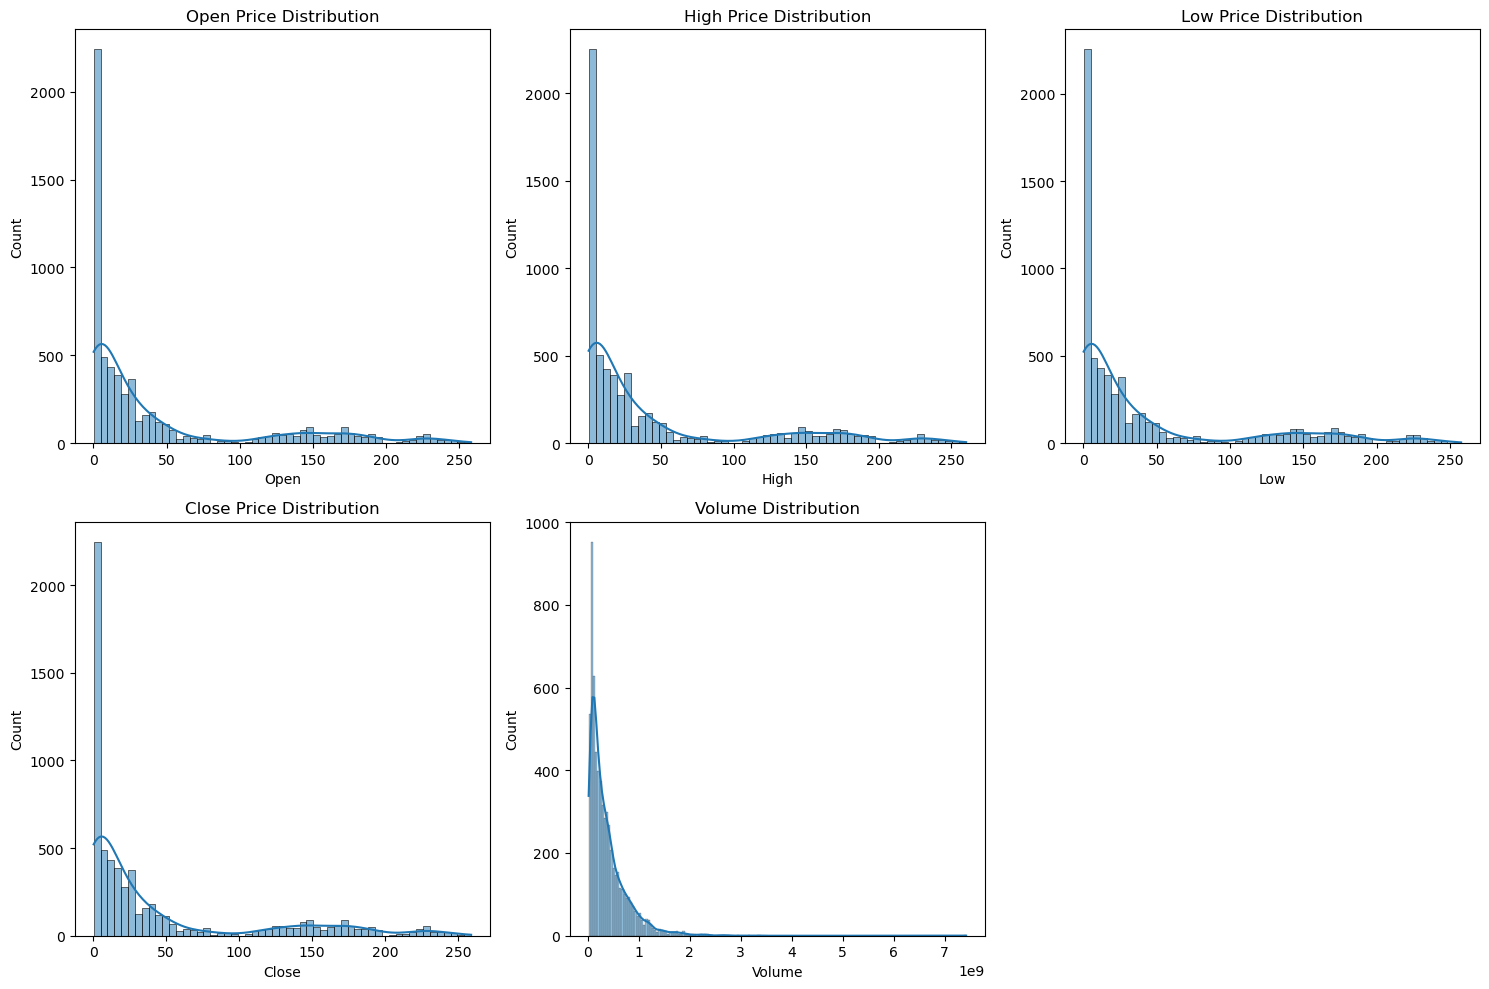

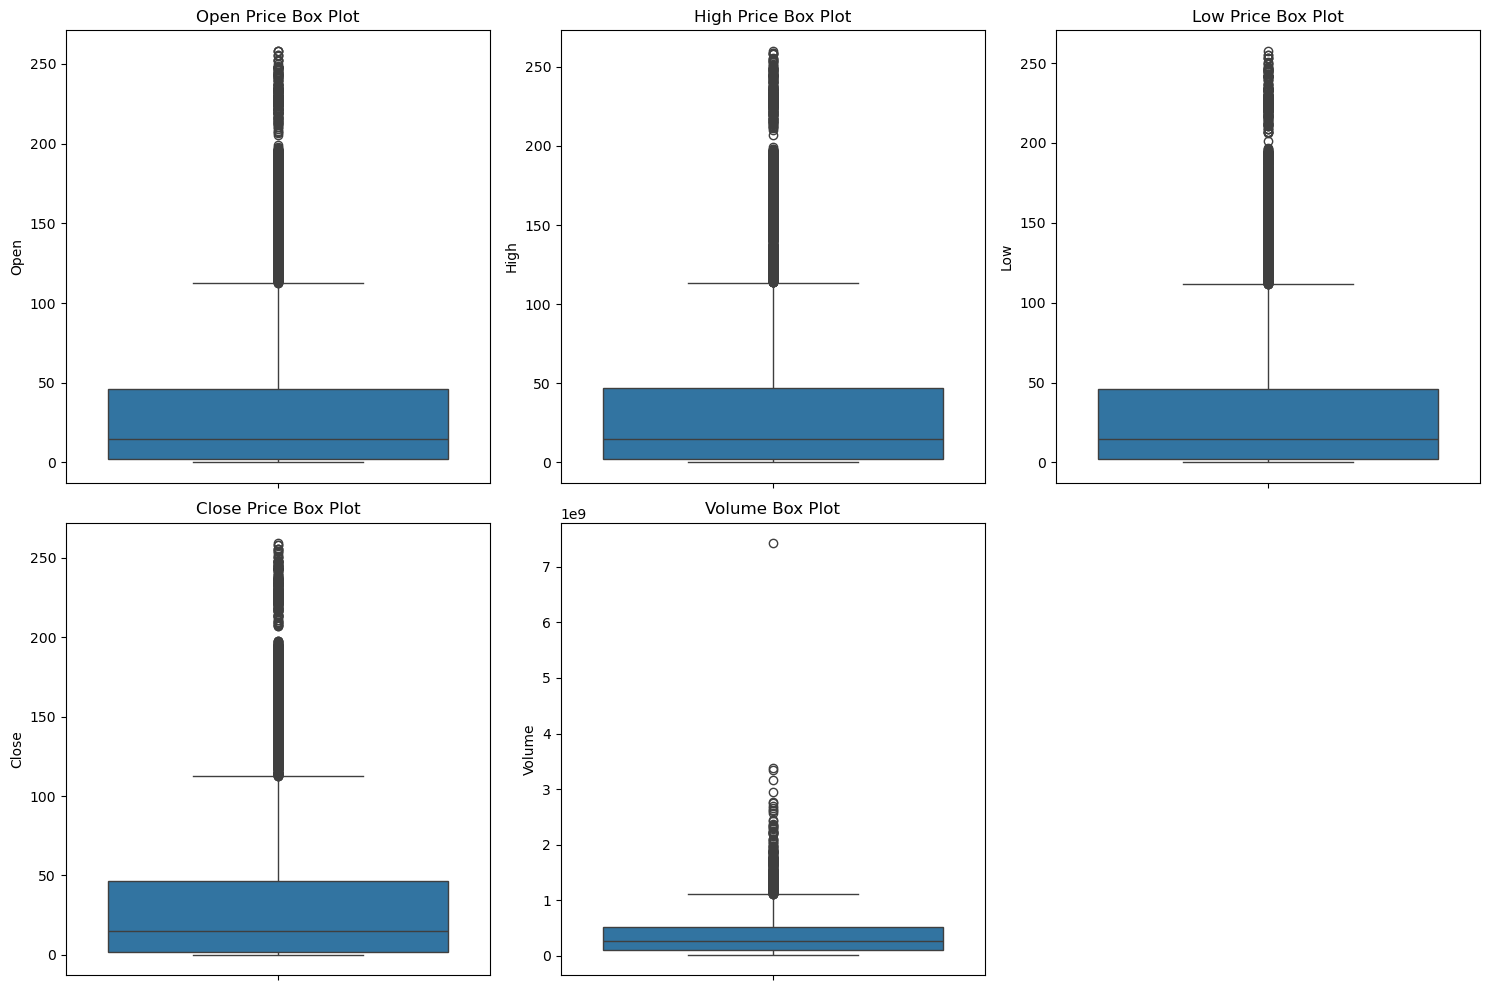

In [74]:
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(aapl_data["Open"], kde=True)
plt.title("Open Price Distribution")

plt.subplot(2, 3, 2)
sns.histplot(aapl_data["High"], kde=True)
plt.title("High Price Distribution")

plt.subplot(2, 3, 3)
sns.histplot(aapl_data["Low"], kde=True)
plt.title("Low Price Distribution")

plt.subplot(2, 3, 4)
sns.histplot(aapl_data["Close"], kde=True)
plt.title("Close Price Distribution")

plt.subplot(2, 3, 5)
sns.histplot(aapl_data["Volume"], kde=True)
plt.title("Volume Distribution")

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(y=aapl_data["Open"])
plt.title("Open Price Box Plot")

plt.subplot(2, 3, 2)
sns.boxplot(y=aapl_data["High"])
plt.title("High Price Box Plot")

plt.subplot(2, 3, 3)
sns.boxplot(y=aapl_data["Low"])
plt.title("Low Price Box Plot")

plt.subplot(2, 3, 4)
sns.boxplot(y=aapl_data["Close"])
plt.title("Close Price Box Plot")

plt.subplot(2, 3, 5)
sns.boxplot(y=aapl_data["Volume"])
plt.title("Volume Box Plot")

plt.tight_layout()
plt.show()

## Observations from Histograms and Box Plots

The following observations were made from the histograms and box plots of Apple's stock data:

**Histograms:**

*   **Skewness:** The histograms for "Open," "High," "Low," and "Close" prices are all heavily right-skewed. This indicates that the majority of the data points are concentrated towards the lower end of the price range, with a long tail extending towards higher prices.
*   **Distribution Shape:** The price distributions (Open, High, Low, Close) show a similar pattern, reinforcing the visual correlation observed in the time series plots.
*   **Volume Distribution:**  The "Volume" histogram is also heavily right-skewed, showing that most trading days have relatively low volume, but some days have exceptionally high volume.

**Box Plots:**

*   **Outliers:** The box plots confirm the presence of outliers, particularly in the higher price ranges for "Open," "High," "Low," and "Close." This is consistent with the right-skewed histograms.
*   **Volume Outliers:** The "Volume" box plot also shows several outliers, indicating days with exceptionally high trading volume.
*   **Median and IQR:** The median lines and the Interquartile Ranges (IQR) demonstrate the central tendency and spread of the middle 50% of the data for each feature.
*   **Range:** The whiskers in the box plots illustrate the range of the data, excluding outliers, showing a wide range for volume traded.

**Overall:**

*   The observations from the histograms and box plots are consistent with the time series plots, reinforcing the stock's overall upward trend and the presence of outliers.
*   The high correlation between "Open," "High," "Low," and "Close" is further supported by the similar distributions and outlier patterns in their respective plots.
*   The significant outliers in the "Volume" data suggest that certain events or periods have a substantial impact on trading activity.

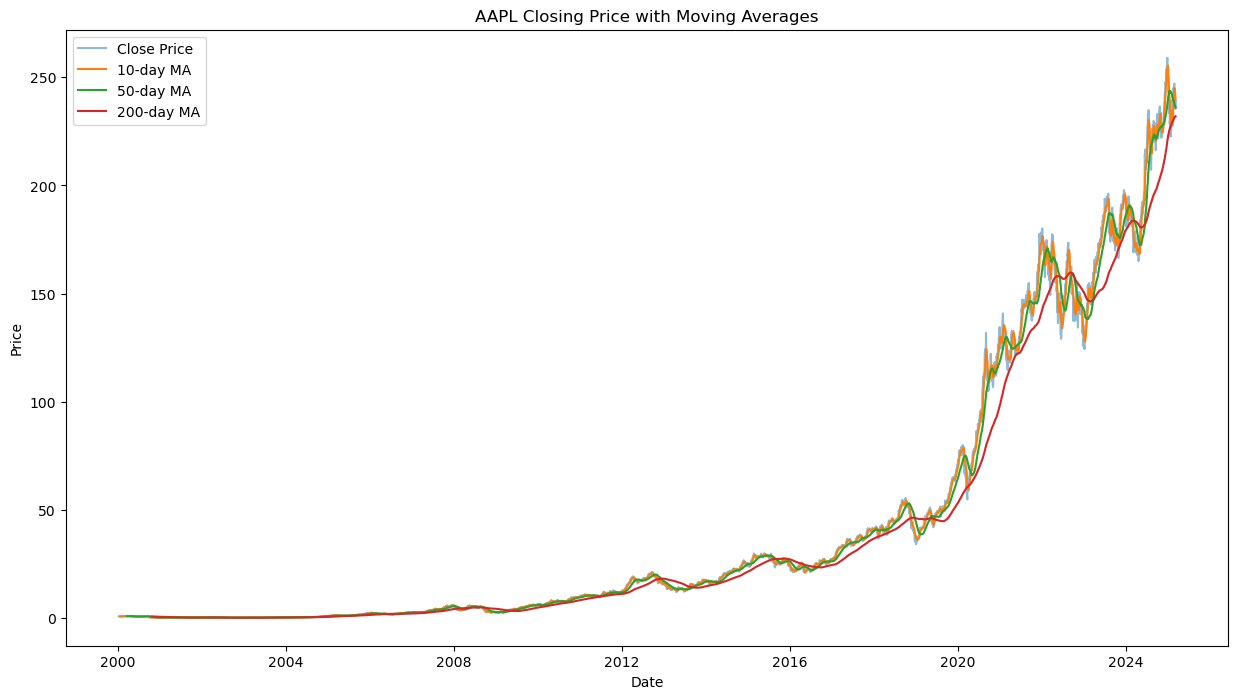

In [77]:
import matplotlib.pyplot as plt

# Calculate moving averages
aapl_data['MA_10'] = aapl_data['Close'].rolling(window=10).mean()
aapl_data['MA_50'] = aapl_data['Close'].rolling(window=50).mean()
aapl_data['MA_200'] = aapl_data['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(15, 8))
plt.plot(aapl_data['Close'], label='Close Price', alpha=0.5)
plt.plot(aapl_data['MA_10'], label='10-day MA')
plt.plot(aapl_data['MA_50'], label='50-day MA')
plt.plot(aapl_data['MA_200'], label='200-day MA')
plt.title('AAPL Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Observations from Moving Averages Plot

The following observations were made from the moving averages plot of Apple's stock data:

* **Smoothing Effect:** The moving averages effectively smooth out the short-term fluctuations in the closing price. The 200-day moving average provides the smoothest representation of the overall trend, while the 10-day moving average follows the price more closely.
* **Trend Identification:** The moving averages clearly highlight the long-term upward trend in Apple's stock price, particularly from around 2020 onwards.
* **Lagging Indicators:** Moving averages are lagging indicators, meaning they reflect past price movements rather than predicting future prices. The 10 day MA reacts to price changes much faster than the 200 day MA.
* **Window Size Impact:** The larger the window size, the smoother the moving average. This is because larger windows average out more data points, reducing the impact of short-term volatility.
* **Potential Trading Signals:** Crossover points between different moving averages could potentially be used as trading signals, although further analysis would be needed to evaluate their effectiveness.

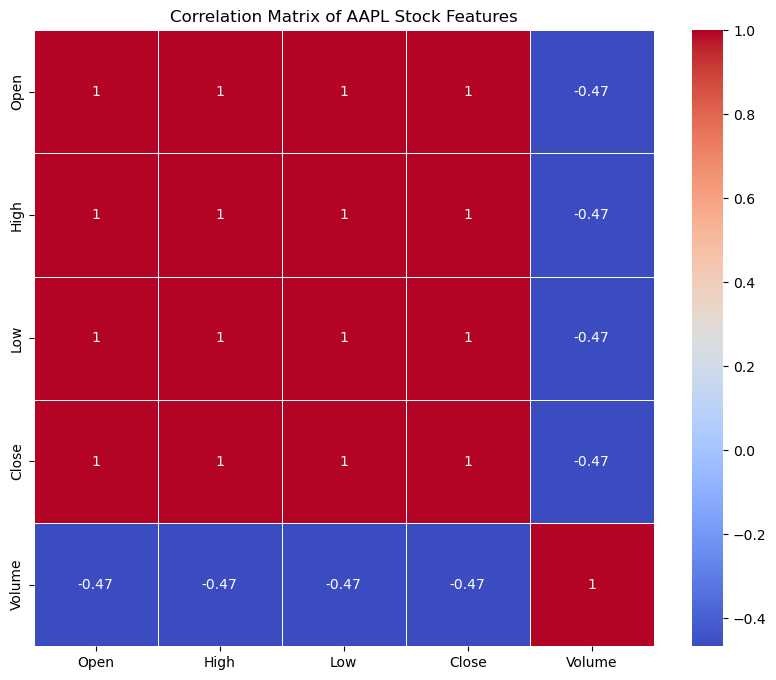

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = aapl_data[["Open", "High", "Low", "Close", "Volume"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of AAPL Stock Features")
plt.show()

## Observations from Correlation Matrix

The following observations were made from the correlation matrix of Apple's stock data:

* **High Positive Correlation Among Price Features:** The "Open," "High," "Low," and "Close" prices are perfectly positively correlated (correlation coefficient of 1). This indicates a strong linear relationship between these features, suggesting potential redundancy for the model.
* **Negative Correlation Between Price and Volume:** There is a moderate negative correlation (-0.47) between "Volume" and all the price features. This suggests that as the stock price increases, the trading volume tends to decrease, and vice versa.
* **Implications for Modeling:** The high correlation among price features suggests that including all of them in the model might not be necessary. Feature selection techniques could be used to reduce redundancy. The negative correlation between volume and price could be a useful feature for the model to capture market dynamics.

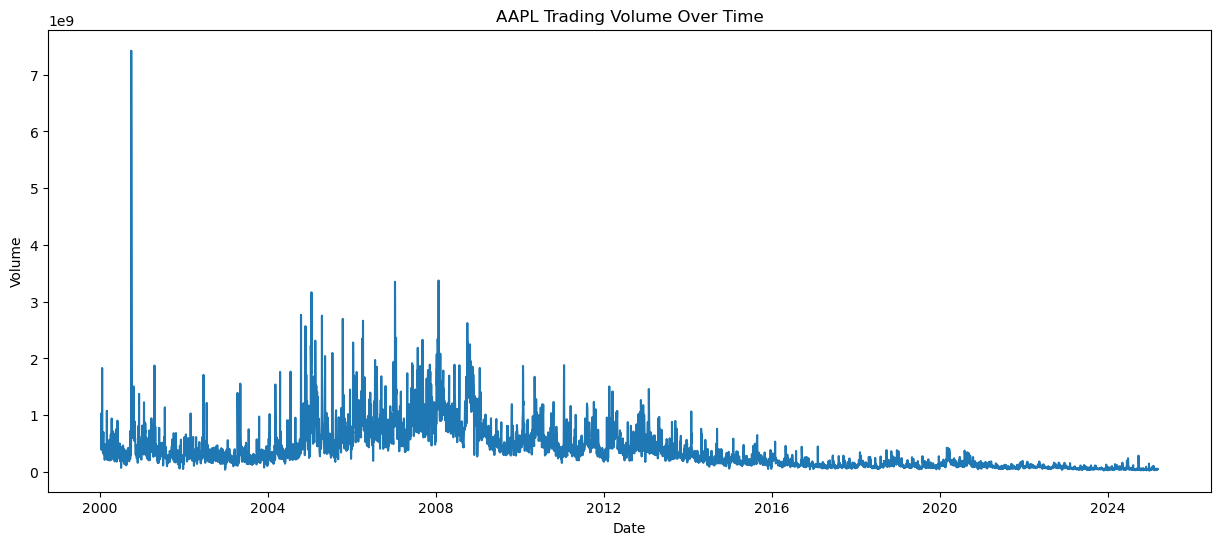

In [83]:
import matplotlib.pyplot as plt

# Plot volume over time
plt.figure(figsize=(15, 6))
plt.plot(aapl_data["Volume"])
plt.title("AAPL Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

## Observations from AAPL Trading Volume Over Time

The following observations were made from the trading volume plot of Apple's stock data:

* **Early Spikes:** There are significant spikes in trading volume during the early years (around 2000-2004), indicating periods of high market activity. The initial spike is extremely large, suggesting a potentially significant event or data anomaly.
* **Decreasing Trend:** From approximately 2010 onwards, there's a general decreasing trend in trading volume.
* **Volatility:** The trading volume exhibits volatility throughout the entire period, with fluctuations between high and low activity.
* **Potential Outliers:** The large spikes, particularly the initial one, suggest the presence of outliers in the volume data, which could be due to specific events or data errors.

These observations highlight the need to:

* Investigate the causes of the early volume spikes, especially the extreme initial spike.
* Consider the decreasing trend in volume when modeling stock behavior.
* Account for the volatility and potential outliers in the volume data.

/var/folders/gs/y2msp5h950783qs6_n60qqk80000gn/T/ipykernel_43033/3387994546.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = aapl_data["Close"].resample("M").mean()


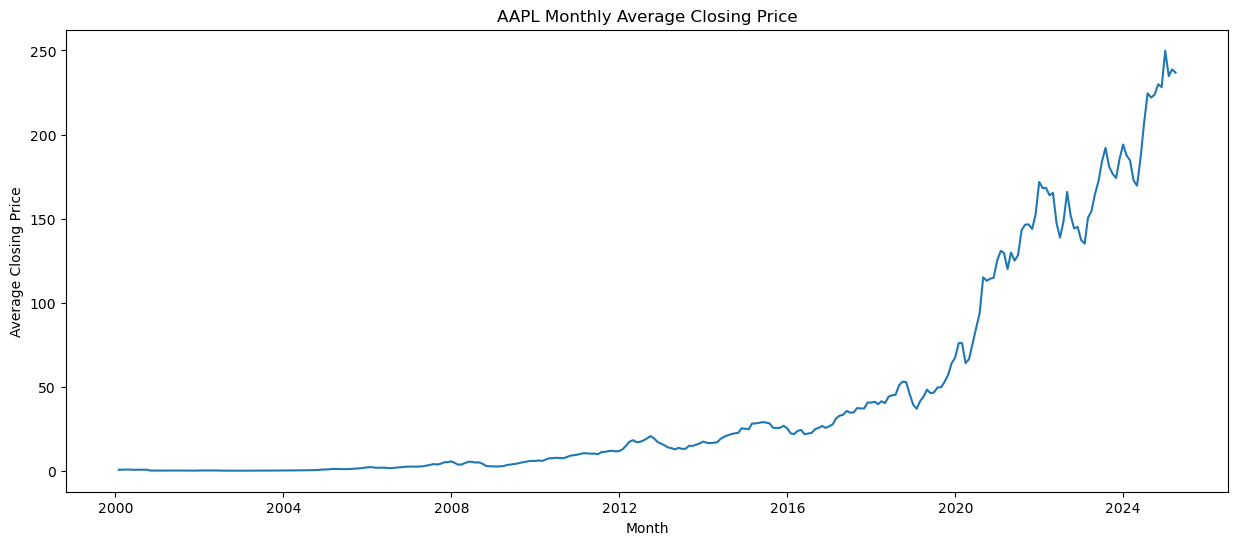

In [86]:
import matplotlib.pyplot as plt

# Resample to monthly average
monthly_avg = aapl_data["Close"].resample("M").mean()

# Plot monthly average
plt.figure(figsize=(15, 6))
plt.plot(monthly_avg)
plt.title("AAPL Monthly Average Closing Price")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.show()

## Observations from AAPL Monthly Average Closing Price

The following observations were made from the monthly average closing price plot of Apple's stock data:

* **Clear Upward Trend:** The plot demonstrates a clear long-term upward trend in Apple's stock price, particularly pronounced from around 2020 onwards.
* **Smoothing Effect:** Averaging the closing price by month effectively smooths out daily fluctuations, highlighting the long-term trend.
* **Consistent Growth:** The plot illustrates the consistent growth of Apple's stock over the years, with periods of accelerated growth.
* **Volatility Indication:** While smoothed, the plot still indicates periods of higher volatility through steeper inclines.

These observations highlight the strong growth trajectory of Apple's stock and the effectiveness of monthly averaging in visualizing long-term trends.

In [89]:
import pandas as pd

# Load your data
df = pd.read_csv("World-Stock-Dataset.csv")

# Get number of rows and columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Get column names
print(f"Column names: {df.columns.tolist()}")

Number of rows: 304545
Number of columns: 13
Column names: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Brand_Name', 'Ticker', 'Industry_Tag', 'Country', 'Capital Gains']


In [91]:
import pandas as pd

# Assuming aapl_data is your DataFrame after preprocessing

# Calculate moving averages
aapl_data['MA_10'] = aapl_data['Close'].rolling(window=10).mean()
aapl_data['MA_50'] = aapl_data['Close'].rolling(window=50).mean()
aapl_data['MA_200'] = aapl_data['Close'].rolling(window=200).mean()

# Drop rows with NaN values resulting from moving average calculations
aapl_data = aapl_data.dropna()

print(aapl_data.head()) # Print the first few rows to verify the new columns

                               Open      High       Low     Close  \
Date                                                                
2000-10-23 04:00:00+00:00  0.307168  0.311668  0.294616  0.308825   
2000-10-24 04:00:00+00:00  0.313562  0.316404  0.285143  0.286090   
2000-10-25 04:00:00+00:00  0.288932  0.290827  0.279459  0.280406   
2000-10-26 04:00:00+00:00  0.285143  0.286090  0.265249  0.280406   
2000-10-27 04:00:00+00:00  0.286090  0.290827  0.270933  0.281353   

                                Volume  Dividends  Stock Splits Brand_Name  \
Date                                                                         
2000-10-23 04:00:00+00:00  551292000.0        0.0           0.0      apple   
2000-10-24 04:00:00+00:00  804451200.0        0.0           0.0      apple   
2000-10-25 04:00:00+00:00  663969600.0        0.0           0.0      apple   
2000-10-26 04:00:00+00:00  721851200.0        0.0           0.0      apple   
2000-10-27 04:00:00+00:00  744503200.0        0.

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming aapl_data is your DataFrame with all features

# RSI Calculation (Ensure this is run first)
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    avg_gain = up.rolling(window=period).mean()
    avg_loss = abs(down.rolling(window=period).mean())
    rs = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

aapl_data['RSI_14'] = calculate_rsi(aapl_data)
aapl_data = aapl_data.dropna() #drop nan values created by rsi calculation.

# Debugging: Inspect DataFrame
print(aapl_data.columns)
print(aapl_data.isnull().sum())

# Prepare data
features = ['Close_1', 'Close_2', 'Close_3', 'Close_4', 'Close_5', 'Volume', 'MA_10', 'MA_50', 'MA_200', 'RSI_14']
target = 'Close'

X = aapl_data[features]
y = aapl_data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# ... (rest of your model training and evaluation code)

ValueError: cannot reindex on an axis with duplicate labels

In [99]:
import pandas as pd

# Assuming aapl_data is your DataFrame

# Identify Duplicates
print("Duplicate Indices:")
print(aapl_data[aapl_data.index.duplicated(keep=False)])

# Handle Duplicates (Remove duplicates, keeping the first occurrence)
aapl_data = aapl_data[~aapl_data.index.duplicated(keep='first')]

# Verify Duplicates are Removed
print("\nDuplicate Indices After Removal:")
print(aapl_data[aapl_data.index.duplicated(keep=False)])

# RSI Calculation (Now it should work)
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    avg_gain = up.rolling(window=period).mean()
    avg_loss = abs(down.rolling(window=period).mean())
    rs = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

aapl_data['RSI_14'] = calculate_rsi(aapl_data)
aapl_data = aapl_data.dropna() #drop nan values created by rsi calculation.

# ... (rest of your model training and evaluation code)

Duplicate Indices:
                                 Open        High         Low       Close  \
Date                                                                        
2023-09-08 04:00:00+00:00  178.350006  180.238998  177.789993  178.179993   
2023-09-08 04:00:00+00:00  178.350006  180.240005  177.789993  178.179993   
2023-09-13 04:00:00+00:00  176.509995  177.300003  173.979996  174.210007   
2023-09-13 04:00:00+00:00  176.509995  177.300003  173.979996  174.210007   
2023-09-15 04:00:00+00:00  176.479996  176.494995  173.820007  175.009995   
...                               ...         ...         ...         ...   
2025-02-14 05:00:00+00:00  241.250000  245.550003  240.990005  244.600006   
2025-02-21 05:00:00+00:00  245.949997  248.690002  245.220001  245.550003   
2025-02-21 05:00:00+00:00  245.964996  248.690002  245.220001  245.550003   
2025-02-28 05:00:00+00:00  236.949997  242.089996  234.509995  241.839996   
2025-02-28 05:00:00+00:00  236.949997  242.089996  230.19

/var/folders/gs/y2msp5h950783qs6_n60qqk80000gn/T/ipykernel_43033/2369610441.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['RSI_14'] = calculate_rsi(aapl_data)


In [101]:
import pandas as pd

# Assuming aapl_data is your DataFrame

# Identify Duplicates
print("Duplicate Indices:")
print(aapl_data[aapl_data.index.duplicated(keep=False)])

# Handle Duplicates (Remove duplicates, keeping the first occurrence)
aapl_data = aapl_data[~aapl_data.index.duplicated(keep='first')]

# Verify Duplicates are Removed
print("\nDuplicate Indices After Removal:")
print(aapl_data[aapl_data.index.duplicated(keep=False)])

# RSI Calculation (Now it should work)
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    avg_gain = up.rolling(window=period).mean()
    avg_loss = abs(down.rolling(window=period).mean())
    rs = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

aapl_data.loc[:, 'RSI_14'] = calculate_rsi(aapl_data) # Use .loc to avoid the warning
aapl_data = aapl_data.dropna() #drop nan values created by rsi calculation.

# ... (rest of your model training and evaluation code)

Duplicate Indices:
Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits, Brand_Name, Ticker, Industry_Tag, Country, Close_1, Close_2, Close_3, Close_4, Close_5, MA_10, MA_50, MA_200, RSI_14]
Index: []

Duplicate Indices After Removal:
Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits, Brand_Name, Ticker, Industry_Tag, Country, Close_1, Close_2, Close_3, Close_4, Close_5, MA_10, MA_50, MA_200, RSI_14]
Index: []


In [103]:
import pandas as pd

# Assuming aapl_data is your DataFrame

# Identify Duplicates
print("Duplicate Indices:")
print(aapl_data[aapl_data.index.duplicated(keep=False)])

# Debugging: Check DataFrame Length Before Removal
print("\nDataFrame Length Before Removal:", len(aapl_data))

# Handle Duplicates (Remove duplicates, keeping the first occurrence)
aapl_data = aapl_data.loc[~aapl_data.index.duplicated(keep='first')]

# Debugging: Check DataFrame Length After Removal and First Few Rows
print("\nDataFrame Length After Removal:", len(aapl_data))
print("\nFirst Few Rows After Removal:")
print(aapl_data.head())

# Verify Duplicates are Removed
print("\nDuplicate Indices After Removal:")
print(aapl_data[aapl_data.index.duplicated(keep=False)])

# RSI Calculation (Now it should work)
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    avg_gain = up.rolling(window=period).mean()
    avg_loss = abs(down.rolling(window=period).mean())
    rs = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

aapl_data.loc[:, 'RSI_14'] = calculate_rsi(aapl_data) # Use .loc to avoid the warning
aapl_data = aapl_data.dropna() #drop nan values created by rsi calculation.

# ... (rest of your model training and evaluation code)

Duplicate Indices:
Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits, Brand_Name, Ticker, Industry_Tag, Country, Close_1, Close_2, Close_3, Close_4, Close_5, MA_10, MA_50, MA_200, RSI_14]
Index: []

DataFrame Length Before Removal: 6100

DataFrame Length After Removal: 6100

First Few Rows After Removal:
                               Open      High       Low     Close  \
Date                                                                
2000-12-01 05:00:00+00:00  0.257670  0.265249  0.254828  0.258618   
2000-12-04 05:00:00+00:00  0.260513  0.260513  0.249145  0.252934   
2000-12-05 05:00:00+00:00  0.256723  0.264302  0.248197  0.257670   
2000-12-06 05:00:00+00:00  0.221673  0.227356  0.212199  0.216935   
2000-12-07 05:00:00+00:00  0.218831  0.225462  0.212199  0.216935   

                                 Volume  Dividends  Stock Splits Brand_Name  \
Date                                                                          
2000-12-01 05:00:00+

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming aapl_data is your DataFrame with all features

# Prepare data
features = ['Close_1', 'Close_2', 'Close_3', 'Close_4', 'Close_5', 'Volume', 'MA_10', 'MA_50', 'MA_200', 'RSI_14']
target = 'Close'

X = aapl_data[features]
y = aapl_data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Train Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")

print("Linear Regression Evaluation:")
evaluate_model(y_test, lr_predictions, "Linear Regression")

print("\nRandom Forest Regressor Evaluation:")
evaluate_model(y_test, rf_predictions, "Random Forest")

print("\nSupport Vector Regressor Evaluation:")
evaluate_model(y_test, svr_predictions, "SVR")

Linear Regression Evaluation:
Linear Regression RMSE: 2.7408220385201045
Linear Regression MAE: 2.061601519892041
Linear Regression R-squared: 0.9951194141741341

Random Forest Regressor Evaluation:
Random Forest RMSE: 92.71659253527028
Random Forest MAE: 84.1240936918525
Random Forest R-squared: -4.585026054782558

Support Vector Regressor Evaluation:
SVR RMSE: 132.139093900356
SVR MAE: 126.9279832948494
SVR R-squared: -10.344175268027502


In [109]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming aapl_data is your DataFrame with all features

# Prepare data
features = ['Close_1', 'Close_2', 'Close_3', 'Close_4', 'Close_5', 'Volume', 'MA_10', 'MA_50', 'MA_200', 'RSI_14']
target = 'Close'

X = aapl_data[features]
y = aapl_data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

best_rf_model = grid_search_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
mae = mean_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest RMSE: {rmse}")
print(f"Random Forest MAE: {mae}")
print(f"Random Forest R-squared: {r2}")

# Hyperparameter Tuning for SVR
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svr_model = SVR()
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train_scaled, y_train)

best_params_svr = grid_search_svr.best_params_
print("Best Parameters for SVR:", best_params_svr)

best_svr_model = grid_search_svr.best_estimator_
svr_predictions = best_svr_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
mae = mean_absolute_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)
print(f"SVR RMSE: {rmse}")
print(f"SVR MAE: {mae}")
print(f"SVR R-squared: {r2}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest RMSE: 92.16919844763092
Random Forest MAE: 83.52942196997543
Random Forest R-squared: -4.5192733054464
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVR RMSE: 2.7068442283272467
SVR MAE: 2.015165367430618
SVR R-squared: 0.9952396727783592
